In [1]:
%load_ext autoreload
%autoreload 2

In [65]:
import data_preprocessing

**Warning:** The following command can take serveral minutes and can cause Python to hog a couple gigabytes of RAM.

In [67]:
x_all, y_all = data_preprocessing.generate_training_data()

Generating IDF...
Done
Embeddings done


NameError: name 'one_hots' is not defined

In [18]:
import mygrad as mg
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

In [20]:
x = x_train
y = y_train
x_train = x[:800000]
x_test = x[800000:]
y_train = y[:800000]
y_test = y[800000:]

In [64]:
np.unique(y_train)

array([0])

In [48]:
from mynn.layers.dense import dense
from mynn.optimizers.sgd import SGD

from mygrad.nnet.activations import relu
from mygrad.nnet.initializers import glorot_normal
from mygrad.nnet.losses import softmax_crossentropy

# Define your MyNN-model


class Model:
    def __init__(self, dim_in, num_hidden, dim_out):
        self.d1 = dense(dim_in, num_hidden, weight_initializer=glorot_normal)
        self.d2 = dense(num_hidden, dim_out, weight_initializer=glorot_normal)

    def __call__(self, x):
        """ The model's forward pass functionality.
        
        Parameters
        ----------
        x : Union[numpy.ndarray, mygrad.Tensor], shape=(N, T)
            The batch of size-N.
            
        Returns
        -------
        mygrad.Tensor, shape=(N, 2)
            The model's predictions for each of the N pieces of data in the batch.
        """
        return self.d2(relu(self.d1(x)))

    @property
    def parameters(self):
        """ A convenience function for getting all the parameters of our model. """
        return self.d1.parameters + self.d2.parameters

In [49]:
from mynn.optimizers.adam import Adam
model = Model(50, 10, 3)
optim = Adam(model.parameters)

In [50]:
def accuracy(predictions, truth):
    """
    Returns the mean classification accuracy for a batch of predictions.
    
    Parameters
    ----------
    predictions : Union[numpy.ndarray, mg.Tensor], shape=(N, 2)
        The scores for 2 classes, for a batch of N data points
        
    truth : numpy.ndarray, shape=(N,)
        The true labels for each datum in the batch: each label is an
        integer in [0, 1]
    
    Returns
    -------
    float
    """
    if isinstance(predictions, mg.Tensor):
        predictions = predictions.data
    return np.mean(np.argmax(predictions, axis=1) == truth)

<IPython.core.display.Javascript object>


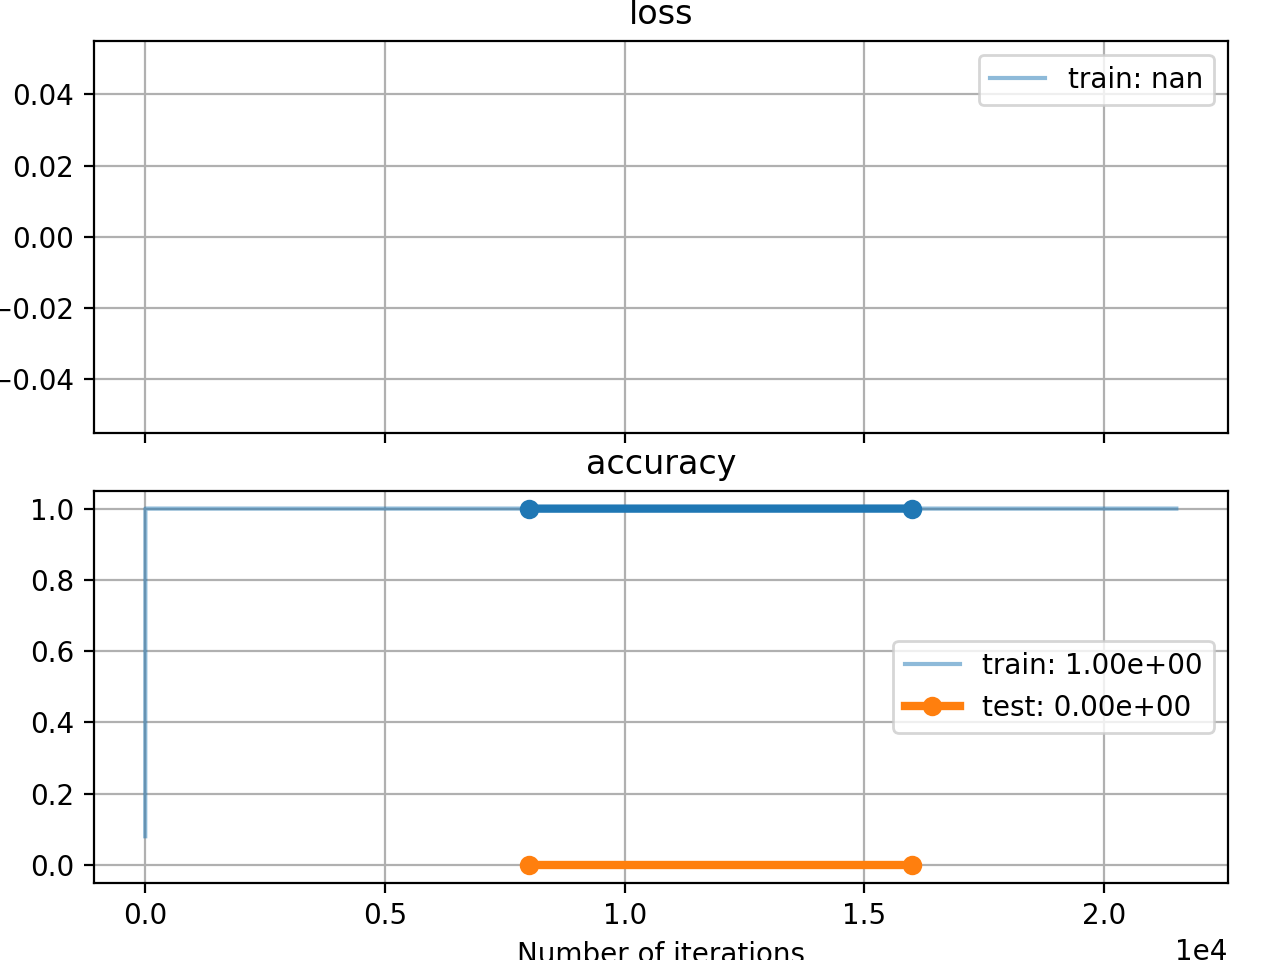

In [51]:
from noggin import create_plot
plotter, fig, ax = create_plot(metrics=["loss", "accuracy"])

In [52]:
# STUDENT CODE HERE

batch_size = 100
num_epochs = 1500

for epoch_cnt in range(num_epochs):
    idxs = np.arange(len(x_train))
    np.random.shuffle(idxs)  
    
    for batch_cnt in range(0, len(x_train) // batch_size):
        batch_indices = idxs[batch_cnt*batch_size : (batch_cnt + 1)*batch_size]
        xbatch = x_train[batch_indices]
        ybatch = y_train[batch_indices]
        
        # compute the predictions for this batch by calling on model
        prediction = model(xbatch)
        # compute the loss associated with our predictions(use softmax_cross_entropy)
        loss = softmax_crossentropy(prediction, ybatch)
        
        # back-propagate through your computational graph through your loss
        loss.backward()
        acc = accuracy(prediction, ybatch)

        # execute gradient-descent by calling step() of optim
        optim.step()
        
        # null your gradients
        loss.null_gradients()
        
        plotter.set_train_batch({"loss" : loss.item(), "accuracy" : acc}, batch_size=batch_size)
    
    for batch_cnt in range(0, len(x_test) // batch_size):
        idxs = np.arange(len(x_test))
        batch_indices = idxs[batch_cnt * batch_size : (batch_cnt + 1) * batch_size]
        batch = x_test[batch_indices]
        truth = y_test[batch_indices]
        
        prediction = model(batch)
        acc = accuracy(prediction, truth)
        
        plotter.set_test_batch({"accuracy" : acc}, batch_size=batch_size)
    
    plotter.set_train_epoch()
    plotter.set_test_epoch()  

/Users/ianmorrill/opt/anaconda3/envs/week3fresh/lib/python3.8/site-packages/mygrad/tensor_base.py:966: RuntimeWarning: invalid value encountered in greater
  return func(x.data, y.data if isinstance(y, Tensor) else y)


KeyboardInterrupt: 